<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/kaggle_titanic_fa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!cp drive/'My Drive'/kaggle.json /root/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 34.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.28MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 17.4MB/s]


In [38]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.10f}'.format

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
sex_dummy=pd.get_dummies(train_df['Sex'])
pclass_dummy=pd.get_dummies(train_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(train_df['Embarked'],prefix='Emb')

train_df=train_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin','PassengerId'],axis=1)
train_df=pd.concat([train_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())

In [8]:
train_df.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
Pclass_1    0
Pclass_2    0
Pclass_3    0
Emb_C       0
Emb_Q       0
Emb_S       0
dtype: int64

In [9]:
y_train_df=train_df['Survived']
X_train_df=train_df.drop(['Survived'],axis=1)

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
sex_dummy=pd.get_dummies(test_df['Sex'])
pclass_dummy=pd.get_dummies(test_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(test_df['Embarked'],prefix='Emb')

test_df=test_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin','PassengerId'],axis=1)
test_df=pd.concat([test_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

X_test=test_df

In [12]:
X_test.isnull().sum()

Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
Pclass_1    0
Pclass_2    0
Pclass_3    0
Emb_C       0
Emb_Q       0
Emb_S       0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_X_train_df=pd.DataFrame(scaler.fit_transform(X_train_df),columns=X_train_df.columns)

In [16]:
scaled_X_train_df

,Age,SibSp,Parch,Fare,female,male,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
0,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
1,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
2,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
3,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
4,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.565685,1.960202,-1.107926,-0.482043,-0.307562,0.619306
887,-0.823344,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
888,0.000000,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
889,-0.284663,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710


In [17]:
from sklearn.decomposition import FactorAnalysis as FA

In [28]:
fa=FA(n_components=3)
fa_X_train_df=pd.DataFrame(fa.fit_transform(scaled_X_train_df))

In [29]:
fa_X_train_df

,0,1,2
0,-0.737695,-0.530382,-0.518338
1,1.355574,1.478479,1.293514
2,1.355574,-0.792122,-0.686352
3,1.355574,-0.767163,1.271289
4,-0.737695,-0.528366,-0.443233
...,...,...,...
886,-0.737695,-0.537634,0.054288
887,1.355574,-0.768725,1.118834
888,1.355574,-0.795675,-0.619216
889,-0.737695,1.738897,1.294759


In [30]:
import matplotlib.pyplot as plt

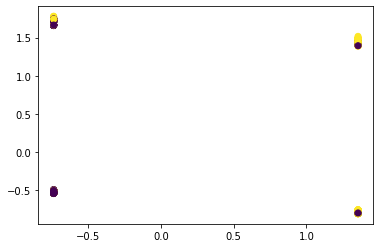

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(fa_X_train_df[0],fa_X_train_df[1],c=y_train_df)

In [34]:
from mpl_toolkits.mplot3d import Axes3D

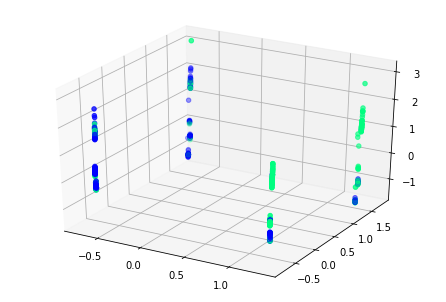

In [35]:
fig=plt.figure()
ax=Axes3D(fig)
surf=ax.scatter(fa_X_train_df[0],fa_X_train_df[1],fa_X_train_df[2],c=y_train_df,cmap='winter')

In [42]:
pd.DataFrame(fa.components_,columns=X_train_df.columns)

,Age,SibSp,Parch,Fare,female,male,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
0,-0.084153,0.114631,0.245489,0.182333,1.000000e+00,-1.000000e+00,0.098013,0.064746,-0.137143,0.082853,0.074115,-0.125722
1,0.042379,-0.087002,-0.094421,0.155513,-4.159748e-12,4.159748e-12,0.173935,-0.205960,0.017758,0.778140,0.473758,-0.984322
2,0.333848,-0.052013,0.004751,0.602763,-2.804862e-13,2.804399e-13,0.834630,-0.003458,-0.716306,0.248984,-0.380347,0.015857
